In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install pmdarima

In [2]:
df = pd.read_csv(r"C:\Users\Emilie Berger\Downloads\airline_passengers.csv", index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df['LogPassengers'] = np.log(df['Passengers'])

In [4]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [5]:
import pmdarima as pm

In [6]:
# call auto arima function, trace --> best model

model = pm.auto_arima(train['Passengers'],
                     trace=True,
                     suppress_warnings=True,
                     saesonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.33 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.80 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.31 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.22 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.22 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.42 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.14 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.33 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [7]:
model.summary()

# orders of the bes models, various p-values,  values of each parameters, statistically significant?
# --> best model AR(3) for non seasonal part and for seasonal part all it does is 1st diff 
# --> (substracting from 12 timesteps behind) --> would it look stationary in code?
# model has only 3 weights and 1 intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Thu, 03 Aug 2023   AIC                            905.686
Time:                                    14:34:48   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
# model.predict
# conf_int so we can plot ci

test_pred, cofint = model.predict(n_periods=Ntest, return_conf_int=True)

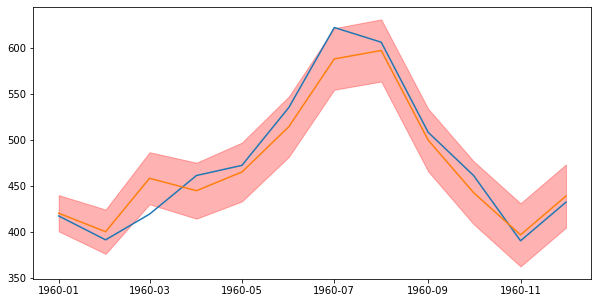

In [9]:
# plot forecast along with true values

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index,
               cofint[:,0], cofint[:,1],
               color='red', alpha=0.3)

# forecast pretty good

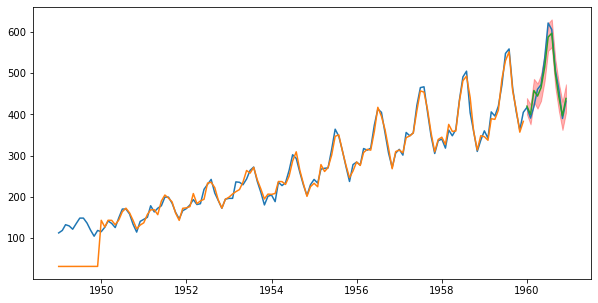

In [10]:
# plot of ful model prediction with forecast and in sample predictions with full training predictions

train_pred = model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index,
               cofint[:,0], cofint[:,1],
               color='red', alpha=0.3)

# both training pred and forecast look pretty good.
# weird at beginning, flat line
# since we got seasonal model --> not possible to make pred for first few timesteps
# require values from 1 season behind which don't exist

In [11]:
# migt work better on Log Dataset

logmodel = pm.auto_arima(train['LogPassengers'],
                        trace=True,
                        suppress_warning=True,
                        seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-440.015, Time=1.30 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=0.62 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.04 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.325, Time=1.14 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=0.60 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.329, Time=4.73 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.713, Time=1.33 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=3.38 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.574, Time=2.52 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.60 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-442.366, Time=2.27 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.534, Time=3.37 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [12]:
logmodel.summary()

# different model
# 2 ar coeffs and 1 seasonal ma coeff
# --> seasonal differencing rather than non seasonal

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Thu, 03 Aug 2023   AIC                           -448.052
Time:                                      14:35:53   BIC                           -434.114
Sample:                                  01-01-1949   HQIC                          -442.392
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0193      0.009      2.161      0.031       0.002       0.037
ar.L1          0.5998      0.083      7.264      0.000       0.438       0.762
ar.L2          0.2415      0.085      2.851      0.004       0.075       0.408
ma.S.L12      -0.5675      0.105     -5.422      0.000      -0.773      -0.362
sigma2         0.0012      0.000      8.192      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.11
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

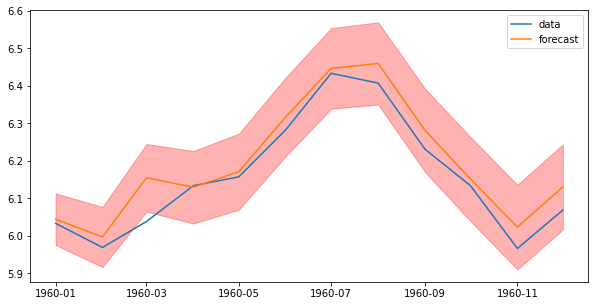

In [13]:
test_pred_log, cofint = logmodel.predict(n_periods=Ntest, return_conf_int=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index,
               cofint[:,0], cofint[:,1],
               color='red', alpha=0.3)

ax.legend()

# qualitatively the result still looks pretty good :)

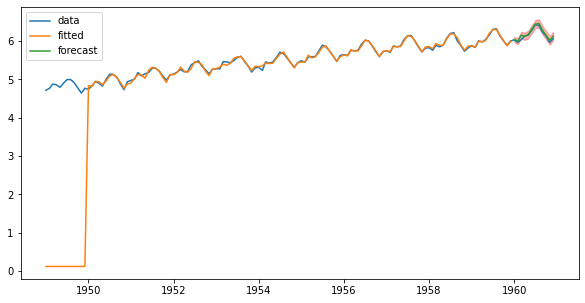

In [14]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index,
               cofint[:,0], cofint[:,1],
               color='red', alpha=0.3)

ax.legend()

# plot hard to see since first few values strech all the way dowwn to zero
# we could block it but let's not bother

In [15]:
# Since those 2 models seem to be performing well --> test them quantitatively

### forecast RMSE

def rmse(t, y):
    return np.sqrt(np.mean((t - y)**2))

print("Non-logged RMSE:", rmse(test['Passengers'], test_pred))
print("Logged RMSE:", rmse(test['Passengers'], np.exp(test_pred_log)))

# opposite result from previously

# non-log is better

Non-logged RMSE: 18.536468982716762
Logged RMSE: 23.06889994143097


In [16]:
# test AR itself --> can it find what we found last time?
# more parameters max_p, max_q --> put them higher than default to even have a chance
# max_order --> find a simpler model
# stepwise controls if intellingent algo to search the hyperparameter space
# or a naive grid search, default is true anyways

### non-seasonal
model = pm.auto_arima(train['LogPassengers'],
                     trace=True,
                     suppress_warnings=True,
                     max_p=12, max_q=2, max_order=14,
                     stepwise =False, # Over Here!
                     seasonal=False)

# doesnt' even try that many values
# we never get past p = 5
# but might still be a better model

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-240.135, Time=0.44 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-216.024, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-246.045, Time=0.92 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-246.403, Time=0.80 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-229.057, Time=0.36 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-227.139, Time=0.63 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-251.010, Time=0.90 sec
 ARIMA(5,1,0)(0,0,0)[0] i

In [17]:
model.summary()

# presubably best model is ARIMA(4, 1, 2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 1)   Log Likelihood                 227.902
Date:                Thu, 03 Aug 2023   AIC                           -425.804
Time:                        14:36:36   BIC                           -382.676
Sample:                    01-01-1949   HQIC                          -408.279
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0095      0.007      1.464      0.143      -0.003       0.022
ar.L1          0.0100      0.098      0.102      0.919      -0.181       0.201
ar.L2         -0.1041      0.070     -1.493      0.136      -0.241       0.033
ar.L3         -0.0432      0.071     -0.605      0.545      -0.183       0.097
ar.L4         -0.1284      0.076     -1.679      0.093      -0.278       0.021
ar.L5         -0.0227      0.071     -0.321      0.749      -0.162       0.116
ar.L6         -0.0960      0.071     -1.354      0.176      -0.235       0.043
ar.L7         -0.0416      0.075     -0.553      0.580      -0.189       0.106
ar.L8         -0.1474      0.069     -2.132      0.033      -0.283      -0.012
ar.L9         -0.0097      0.084     -0.115      0.908      -0.174       0.155
ar.L10        -0.1241      0.068     -1.816      0.069      -0.258       0.010
ar.L11         0.0198      0.076      0.259      0.796      -0.130       0.169
ar.L12         0.7614      0.065     11.796      0.000       0.635       0.888
ma.L1         -0.3709      0.135     -2.744      0.006      -0.636      -0.106
sigma2         0.0016      0.000      7.054      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.80
Prob(Q):                              0.89   Prob(JB):                         0.25
Heteroskedasticity (H):               0.36   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

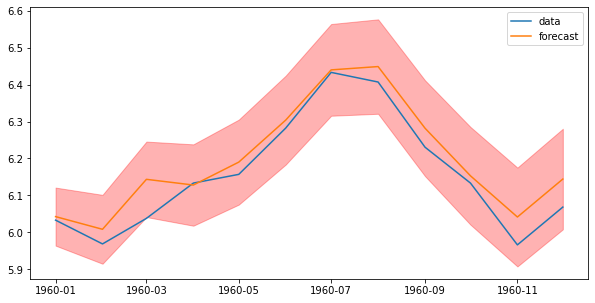

In [18]:
# let's plot it

test_pred, cofint = model.predict(n_periods=Ntest, return_conf_int=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index,
               cofint[:,0], cofint[:,1],
               color='red', alpha=0.3)

ax.legend()

# forecast pretty bad

# 2nd attemps really good

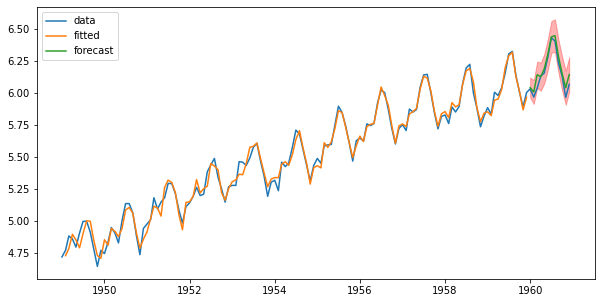

In [19]:
# let's plot both training tests together

train_pred = model.predict_in_sample(start=1, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index[1:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index,
               cofint[:,0], cofint[:,1],
               color='red', alpha=0.3)

ax.legend()

# again, not so great :(

# 2nd attemps, pretty good

In [20]:
rmse(test['Passengers'], np.exp(test_pred))

# very High :o

# compare what we just did to naive grid search
# change stepwise to false
# this time ar testing all possible combination of model
# --> bad idea for full SARIMA model
# this time 2 dimensional grid

# much better, however, higher rmse than what we found before
# but this model has one more parameter
# finding best aic is not the same as minimising the out of sample error

23.136150645404967